In [1]:
from experiment import compare_taxes
from util import generate_random_symmetric_binary_matrix, draw_network
from linear_quadratic import LinearQuadraticGame

import numpy as np

In [9]:
N = 8
g = generate_random_symmetric_binary_matrix(N, 0.5)
# g = np.array([
#  [0, 1, 1, 1, 1, 1],
#  [1, 0, 0, 0, 0, 0],
#  [1, 0, 0, 0, 0, 0],
#  [1, 0, 0, 0, 0, 0],
#  [1, 0, 0, 0, 0, 0],
#  [1, 0, 0, 0, 0, 0]])

g = np.array([
 [0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 0, 0]])

# g = np.zeros((N, N))
# g[list(range(N-1)), list(range(1, N))] = 1
# g[list(range(1, N)), list(range(N-1))] = 1

# g = np.ones((N, N))
np.fill_diagonal(g, 0)

print(g)

[[0 1 0 1 1 0 1 0]
 [1 0 1 0 1 0 0 0]
 [0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0]
 [0 0 1 0 1 1 0 0]]


In [16]:
phi = .1
alpha = np.random.rand(N)
result = compare_taxes(alpha, phi, g, "random")
alpha, result

# Positive perms find: 32618 (0, 1, 2, 3, 5, 6, 4, 7)
# Negative perms find: 7702 (7, 5, 4, 3, 0, 1, 6, 2)


(array([0.12220832, 0.4598933 , 0.71174519, 0.84248965, 0.07654302,
        0.00666103, 0.89555622, 0.38269483]),
 {'opt': np.float64(0.15516625002880235),
  'optimal_rank': (3, 6, 2, 7, 1, 0, 5, 4),
  'test': np.float64(-0.05855805869246079),
  'seq_tax_by_test': array([-0.02107505, -0.00256959, -0.00908992, -0.00098482, -0.03184583,
         -0.00106011,  0.00209885,  0.00596842]),
  'network': array([[0, 1, 0, 1, 1, 0, 1, 0],
         [1, 0, 1, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 1, 1, 0, 0]]),
  'test_ordering': array([5, 0, 4, 7, 1, 6, 3, 2])})

In [17]:
phi = .1
alpha = np.asarray([0.12220832, 0.4598933 , 0.71174519, 0.84248965, 0.07654302,
        0.00666103, 0.89555622, 0.38269483])
result = compare_taxes(alpha, phi, g, "pivotal")
alpha, result

# Positive perms find: 32618 (0, 1, 2, 3, 5, 6, 4, 7)
# Negative perms find: 7702 (7, 5, 4, 3, 0, 1, 6, 2)


(array([0.12220832, 0.4598933 , 0.71174519, 0.84248965, 0.07654302,
        0.00666103, 0.89555622, 0.38269483]),
 {'opt': np.float64(0.1551662506210913),
  'optimal_rank': (3, 6, 2, 7, 1, 0, 5, 4),
  'test': np.float64(0.1504361572798505),
  'seq_tax_by_test': array([-0.06393123,  0.04031823,  0.04613158,  0.04739592, -0.03723031,
         -0.00106044,  0.09936505,  0.01944736]),
  'network': array([[0, 1, 0, 1, 1, 0, 1, 0],
         [1, 0, 1, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 1, 1, 0, 0]]),
  'test_ordering': array([3, 5, 6, 2, 7, 1, 4, 0]),
  'pivotal_tax': array([-0.06393123, -0.02397447, -0.00908992, -0.00247058, -0.06085306,
         -0.0031454 , -0.00473975, -0.01392421])})

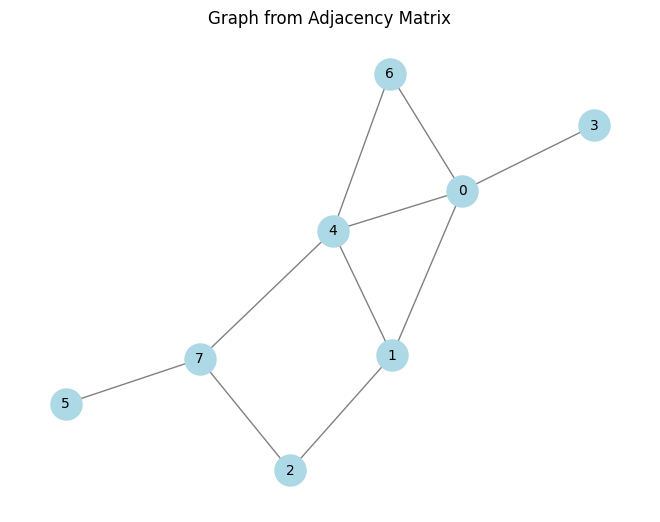

In [5]:
draw_network(g)

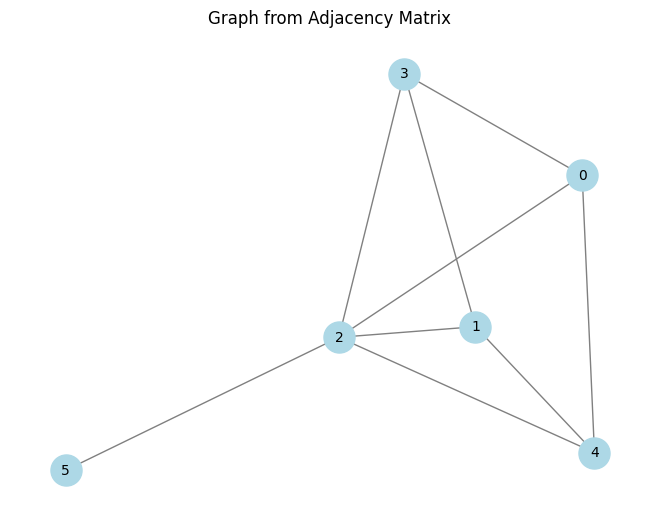

In [3]:
draw_network(g)

In [9]:
game = LinearQuadraticGame(alpha, phi, g)

In [8]:
print(
    game.equilibrium_tax(mechanism="pivotal", ordering=[5, 0, 1, 3, 4, 2]),
    '\n',
    game.equilibrium_tax(mechanism="pivotal", ordering=[5, 0, 3, 1, 4, 2])
)

[-0.04443613 -0.02972238 -0.04443613 -0.07785747 -0.00899399 -0.04469472] 
 [-0.04443613 -0.02972238 -0.04443613 -0.07785747 -0.00899399 -0.04469472]


In [10]:
print(
    game.equilibrium_tax(mechanism="sequential", ordering=[1, 2, 3, 4, 5, 0]),
    '\n',
    game.equilibrium_tax(mechanism="sequential", ordering=[3, 5, 4, 2, 1, 0])
)

[-0.13888889  0.07963989  0.07769353  0.07570239  0.07366493  0.07157952] 
 [-0.13888889  0.07157952  0.07366493  0.07963989  0.07570239  0.07769353]


In [30]:
from tqdm.notebook import tqdm

num_iterations = 1000
for _ in tqdm(range(num_iterations)):
    N = 7
    edge_pr = np.random.choice([.1, .2, .3, .4, .5, .6, .7, .8, .9])
    g = generate_random_symmetric_binary_matrix(N, edge_pr)
    alpha = np.random.rand(N)
    phi = 0.1
    result = compare_taxes(alpha, phi, g, "pivotal")
    assert result['opt'] >= result['test']
    if result['opt'] > 0 > result['test']:
        print(g)
        break

  0%|          | 0/1000 [00:00<?, ?it/s]